# functions

In [1]:
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import utility_functions as uf
warnings.filterwarnings('ignore')

In [2]:
# get the  absolute path of slides
def make_slides_list(slide_path ,slide_list):
  slide_list.sort()
  slide_list = [slide_path + "A" +str(x) +".ndpi" for x in slide_list]
  return slide_list

In [3]:
# get the number list of slides
def get_slides_list_number(slide_path):
  slide_list = os.listdir(slide_path)
  slide_list = [int("".join(filter(str.isdigit, i))) for i in slide_list]
  slide_list.sort()
  return slide_list

In [4]:
#get target gene targets list ( 0 : benign slide, 1: tumor slide )
def get_targets_list(gene,slide_path,info_file_path):
  slide_list = get_slides_list_number(slide_path)
  df = pd.read_csv(info_file_path, sep=",", encoding="utf-8")
  result = df[df["UPN, c4lab"].isin(slide_list)]
  targets_list = result[gene].astype(int).tolist()
  return targets_list

# testing area

In [3]:
slide_path = "/home/exon_storage1/aml_slide/ROI_level0_pixel512/"
slide_list = uf.get_slides_list_number(slide_path)
# slide_path = "/home/exon_storage1/aml_slide/"
# slide_path_otsu_1 = slide_path+"otsu_1.0/"
# slide_path_otsu_2 = slide_path+"otsu_0.9/"
# slide_list = uf.get_slides_list_number(slide_path_otsu_1)
# slide_list2 = uf.get_slides_list_number(slide_path_otsu_2)
# if slide_list == slide_list2:
#     print("two lists are the same and the length of lists are :", len(slide_list))
# slide_path_list = uf.make_paths_list("{}renameByUPN/".format(slide_path),slide_list)
# print(slide_list[:20])

In [4]:
df = pd.read_csv("/home/weber50432/AML_image_processing/code_use_csv/changeSlideName.csv", sep=",", encoding="utf-8")
gene =df.columns[df.columns.get_loc("CEBPA NGS+Direct"):df.columns.get_loc("BCOR")+1]
result = df[df["UPN, c4lab"].isin(slide_list)]
result['UPN, c4lab'] = result['UPN, c4lab'] .apply(lambda x: 'A' + str(x))
result.set_index("UPN, c4lab", inplace=True)
result = result.loc[:,gene]
# ranking the gene
column_sum = result.sum(axis=0).astype(int)
column_sum = column_sum.sort_values(ascending=False)
data = column_sum[:10]
data

ITD NGS+PCR         103
NPM1                101
DNMT3A               99
NRAS                 92
ASXL1                86
RUNX1                84
CEBPA NGS+Direct     83
TET2                 78
IDH2                 70
TP53                 60
dtype: int64

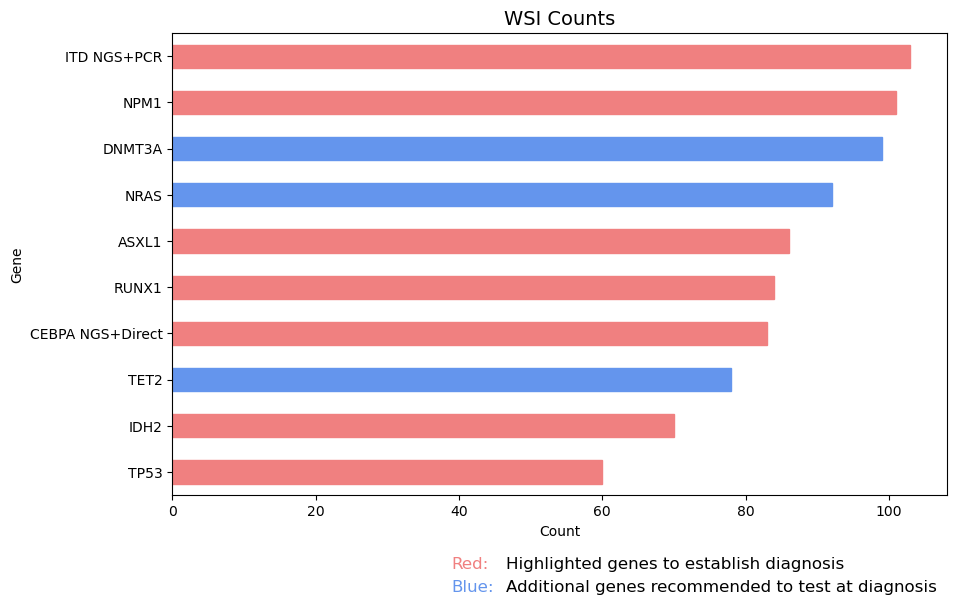

In [5]:
color_one ="cornflowerblue"
color_two = "lightcoral"
color_three = "gray"
highlight_indices = [0, 1, 4, 5, 6, 8, 9]
fig, ax = plt.subplots(figsize=(10, 6))
data.plot(kind='barh', ax=ax,color=color_three)
# Add red markers to the highlighted bars
for i in range(len(data)):
    if i not in highlight_indices:
        ax.get_children()[i].set_color(color_one)
    else:   
        ax.get_children()[i].set_color(color_two)
# Customize the chart
ax.set_xlabel('Count')
ax.set_ylabel('Gene')
ax.set_title('WSI Counts' , fontsize=14)
# Add color patches and text annotations
ax.text(0.36, -0.2, 'Blue:', transform=ax.transAxes, fontsize=12, color=color_one, ha='left', va='center')
ax.text(0.43, -0.2, 'Additional genes recommended to test at diagnosis', transform=ax.transAxes, fontsize=12, ha='left', va='center')
ax.text(0.36, -0.15, 'Red:', transform=ax.transAxes, fontsize=12, color=color_two, ha='left', va='center')
ax.text(0.43, -0.15, 'Highlighted genes to establish diagnosis', transform=ax.transAxes, fontsize=12, ha='left', va='center')
ax.invert_yaxis()

# Display the chart
plt.show()

In [8]:
target_gene = "NPM1"
GENE_list = result[target_gene].astype(int).tolist()
print(result.index[:20])
print(GENE_list[:20])
target = uf.get_targets_list(target_gene,slide_list,"/home/weber50432/AML_image_processing/code_use_csv/changeSlideName.csv")
# print(target[:5])
if target == GENE_list:
    print("yes")


Index(['A3', 'A9', 'A12', 'A13', 'A22', 'A25', 'A26', 'A27', 'A28', 'A29',
       'A59', 'A60', 'A99', 'A102', 'A103', 'A104', 'A105', 'A106', 'A108',
       'A109'],
      dtype='object', name='UPN, c4lab')
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1]
yes


In [2]:
# get the target of a list of slides
slide_list = [103,105,106,108,109,153,349]
target = uf.get_targets_list("NPM1",slide_list,"/home/weber50432/AML_image_processing/code_use_csv/changeSlideName.csv")
print(target)

[1, 0, 0, 0, 1, 0, 1]
